In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset

df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

In [ ]:
# First five rows

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Summary statistics

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Number of rows, and columns

df.shape

(5110, 12)

In [10]:
# check empty data
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

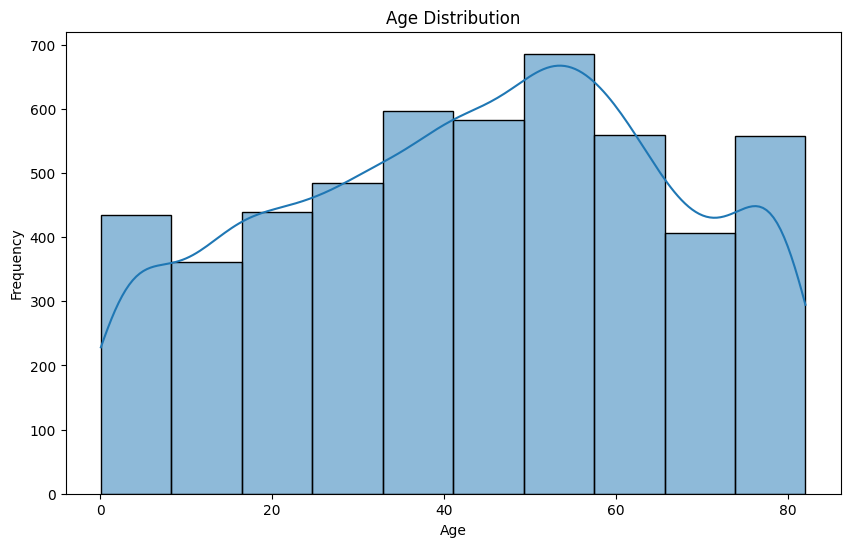

In [12]:
# Distribution of age

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

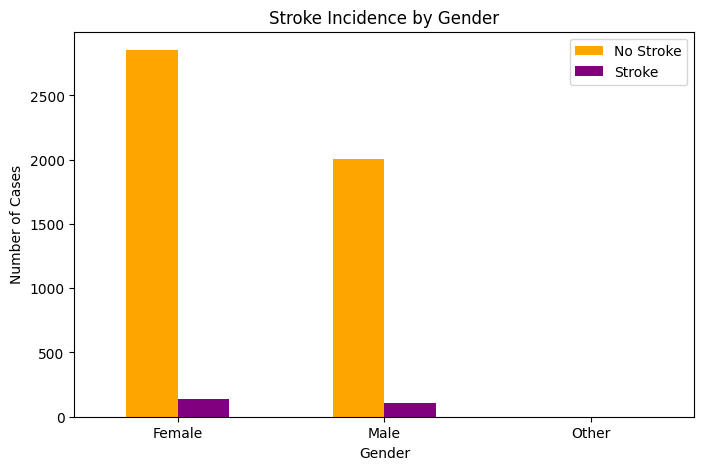

In [13]:
# RELATIONSHIP BETWEEN GENDER AND STROKE INCIDENCE

# Select only the relevant columns
data = df[['id', 'gender', 'stroke']]

# Group by gender and stroke status, then count occurrences
gender_stroke_counts = data.groupby(['gender', 'stroke']).size().unstack()

# Create a bar chart
gender_stroke_counts.plot(kind='bar', figsize=(8, 5), color=['orange', 'purple'])

# Add labels and title
plt.title('Stroke Incidence by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.legend(['No Stroke', 'Stroke'])

# Show the plot


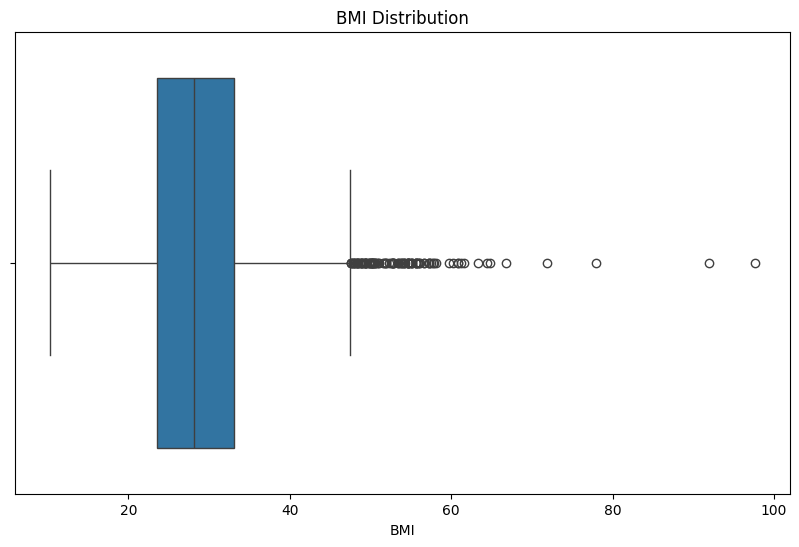

In [14]:
# BMI Distribution

plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi', data=df)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

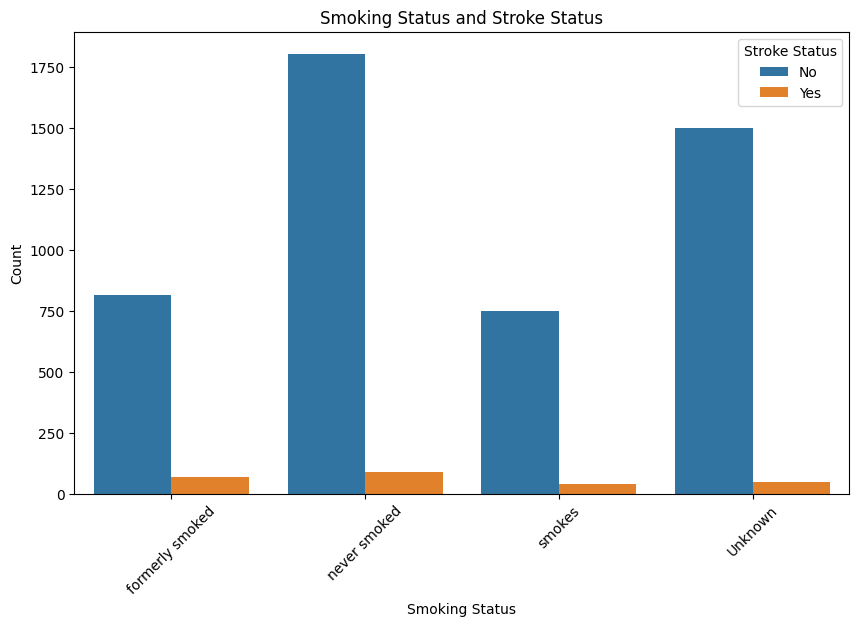

In [15]:
# Smoking status and stroke incidence

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.title('Smoking Status and Stroke Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Stroke Status', labels=['No', 'Yes'])
plt.show()

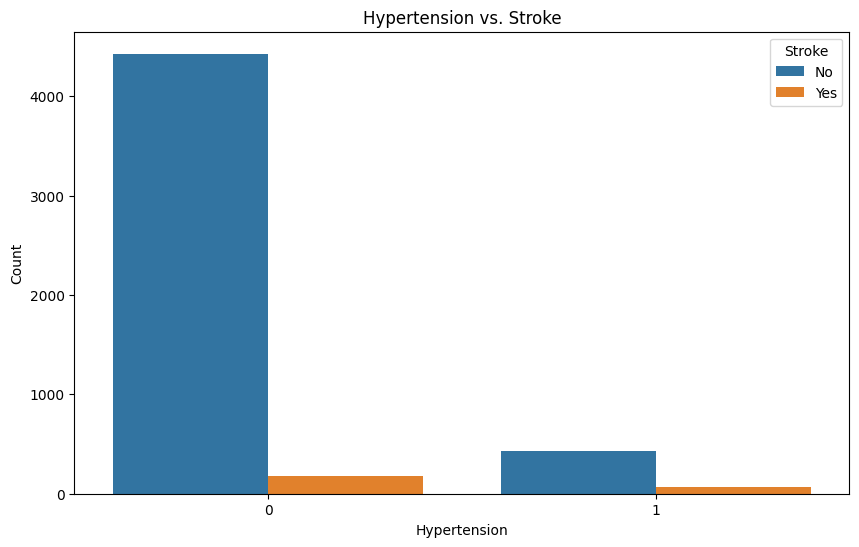

In [16]:
# Hypertension and stroke incidence

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hypertension', hue='stroke')
plt.title('Hypertension vs. Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No', 'Yes'])
plt.show()

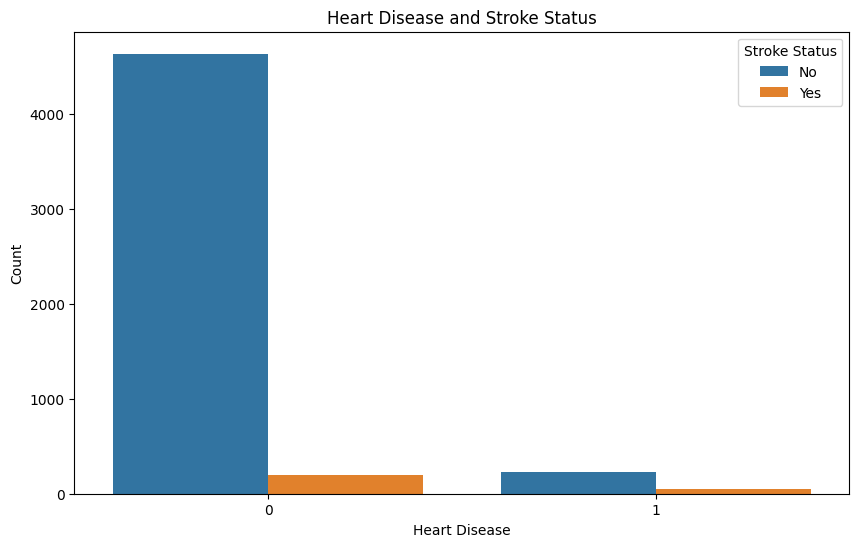

In [17]:
# Heart disease and stroke incidence

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='heart_disease', hue='stroke')
plt.title('Heart Disease and Stroke Status')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='Stroke Status', labels=['No', 'Yes'])
plt.show()

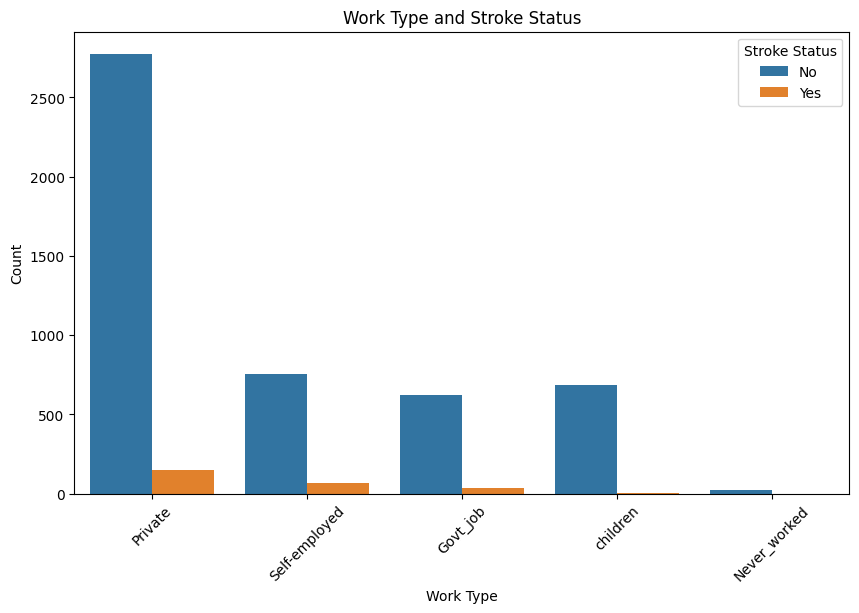

In [18]:
# Relationship between work status and stroke status

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='work_type', hue='stroke')
plt.title('Work Type and Stroke Status')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Stroke Status', labels=['No', 'Yes'])
plt.show()

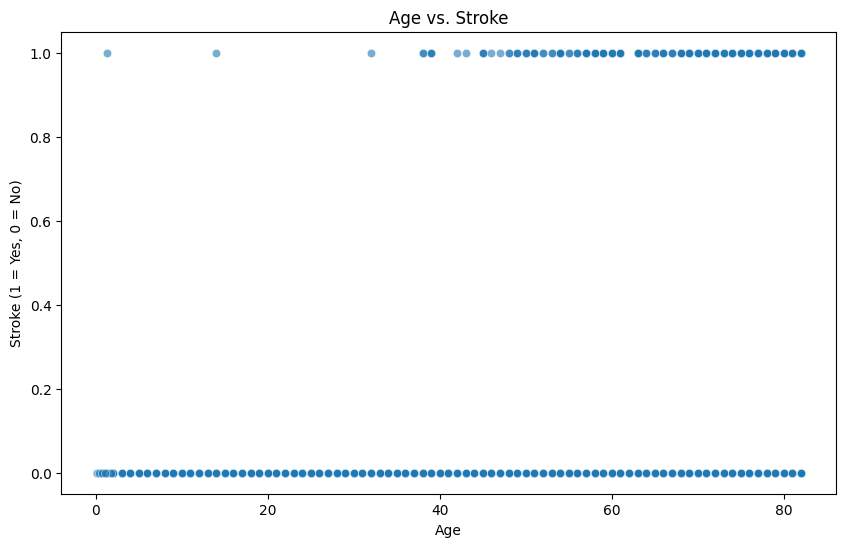

In [19]:
# Age vs Stroke Incidence

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='stroke', alpha=0.6)
plt.title('Age vs. Stroke')
plt.xlabel('Age')
plt.ylabel('Stroke (1 = Yes, 0 = No)')
plt.show()

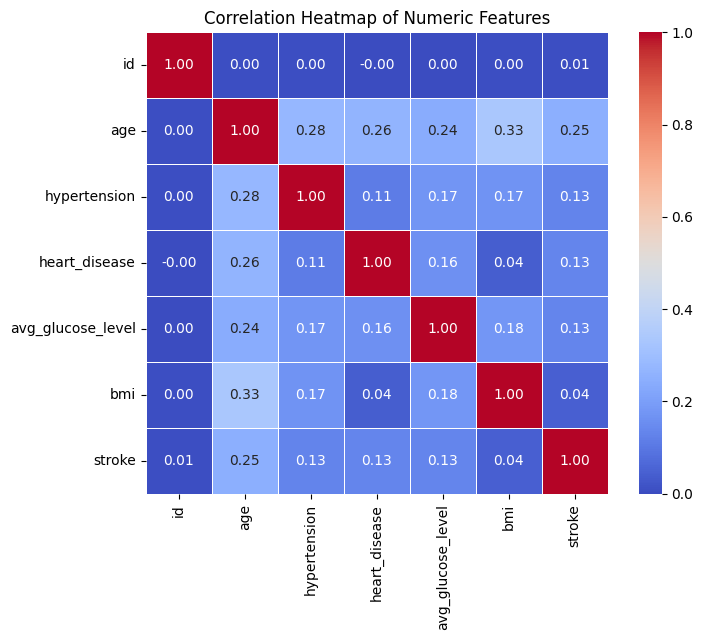

In [20]:
# Correlation heatmap

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()